<a href="https://colab.research.google.com/github/shrutisj12/AgriSense-AI-Intelligent-Crop-Disease-Assistant/blob/main/AgriSenseAI_Phase1_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🌿 DAY 4 – Streamlit App Development + Model Integration**
🎯 Goal

Create a Streamlit-based web interface where users can input soil & climate data → get a recommended crop.

In [5]:
import pandas as pd
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#Streamlit App Code

In [6]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00


In [24]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# -------------------------------
# ✅ Load the trained model
# -------------------------------
try:
    model = joblib.load('crop_recommendation_model.pkl')
except FileNotFoundError:
    st.error("Error: Model file 'crop_recommendation_model.pkl' not found. Please upload the model file.")
    st.stop()
except ValueError as e:
    st.error(f"Error loading model: {e}. The model file might be corrupted. Please re-upload a valid model file.")
    st.stop()

# -------------------------------
# 🌾 Streamlit App Title
# -------------------------------
st.title("🌾 AgriSense AI – Crop Recommendation System")
st.markdown("### Predict the best crop based on soil and climate data.")

# -------------------------------
# 🌱 Input Fields
# -------------------------------
N = st.number_input("Nitrogen (N)", min_value=0, max_value=200, value=50)
P = st.number_input("Phosphorus (P)", min_value=0, max_value=200, value=50)
K = st.number_input("Potassium (K)", min_value=0, max_value=200, value=50)
temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=25.0)
humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=70.0)
ph = st.number_input("pH Level", min_value=0.0, max_value=14.0, value=6.5)
rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=300.0, value=100.0)

# -------------------------------
# 🌻 Predict Button
# -------------------------------
if st.button("🌱 Recommend Crop"):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # ✅ Prediction
    prediction = model.predict(input_data)
    st.success(f"✅ Recommended Crop: **{prediction[0]}**")

    # ✅ Optional: Input summary
    st.write("### 🌾 Input Summary")
    st.dataframe(pd.DataFrame({
        'Feature': ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall'],
        'Value': [N, P, K, temperature, humidity, ph, rainfall]
    }))

    # -------------------------------
    # ✅ Top 3 Crop Recommendations (Visualization)
    # -------------------------------
    try:
        probs = model.predict_proba(input_data)[0]
        crops = model.classes_

        # Sort top 3 predictions
        top_indices = np.argsort(probs)[-3:][::-1]
        top_crops = [crops[i] for i in top_indices]
        top_probs = [probs[i] for i in top_indices]

        # Plot bar chart
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.barh(top_crops, top_probs, color='green')
        ax.set_xlabel("Confidence Score")
        ax.set_title("Top 3 Crop Recommendations")

        st.pyplot(fig)

    except Exception as e:
        st.warning(f"⚠️ Could not generate probability chart: {e}")


Overwriting app.py


####**🚀 Run Streamlit App Silently in Background (Colab Setup)**

This command runs the Streamlit app in the background without showing logs.   
It keeps the notebook clean and allows us to expose the app using ngrok or localtunnel.


In [25]:
!streamlit run app.py &>/dev/null&

#⚙️ Test the App in Colab (Preview)

Run this cell to install Streamlit and ngrok (for public URL preview):


In [26]:
!pip install streamlit pyngrok

# Then run this app:



In [37]:
from pyngrok import ngrok

# 🔑 Replace the string below with YOUR token
ngrok.set_auth_token("Your Auth Token")



#AgriSense AI Crop Recommendation Web App is live! 🎉

In [36]:
import threading, time
from pyngrok import ngrok

ngrok.kill()

def run_app():
    !streamlit run app.py --server.port 8501 &

thread = threading.Thread(target=run_app)
thread.start()

time.sleep(10)

public_url = ngrok.connect(8501)
print(f"🌐 Your Streamlit app is live here: {public_url.public_url}")


y


2025-10-22 12:03:26.552 Port 8501 is already in use
🌐 Your Streamlit app is live here: https://paltriest-jumblingly-bettye.ngrok-free.dev


#(Optional) Add Visualization in Streamlit



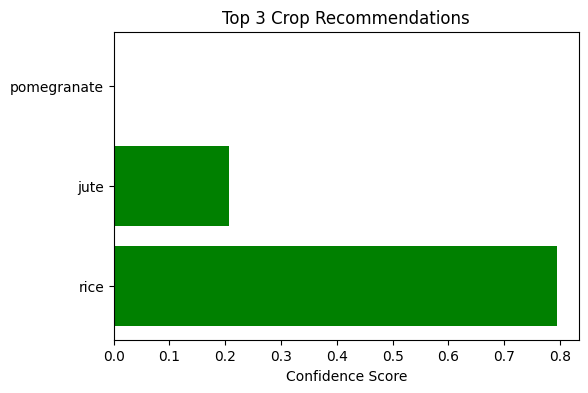

In [29]:
#ADDED CODE
import joblib

# Load your trained model
model = joblib.load('crop_recommendation_model.pkl')

import pandas as pd

# Example input (replace with your own test values)
user_data = pd.DataFrame({
    'N': [90],
    'P': [42],
    'K': [43],
    'temperature': [22.0],
    'humidity': [80.0],
    'ph': [6.5],
    'rainfall': [200.0]
})


import matplotlib.pyplot as plt
import numpy as np

# Suppose you used a classifier that supports predict_proba
probs = model.predict_proba(user_data)[0]
crops = model.classes_

# Sort top 3 predictions
top_indices = np.argsort(probs)[-3:][::-1]
top_crops = [crops[i] for i in top_indices]
top_probs = [probs[i] for i in top_indices]

plt.figure(figsize=(6,4))
plt.barh(top_crops, top_probs, color='green')
plt.xlabel("Confidence Score")
plt.title("Top 3 Crop Recommendations")
plt.show()